# Extended Kalman Filter Project
by Charles Schultz

# Kalman Filter Algorithm

**Assumptions**

1. The state transistion probability must be a linear function in its arguments with added Gaussian noise.
2. The measurement probability must also be linear in its arguments with added Gaussian noise.
3. The belief must be normally distributed.

The kalman filter algorithm is a gaussian filter that attempts to estimate the mean $\mu$ and variance $\sigma^2$ of the state using process and measurement information. The algorithm is defined below

$
\begin{align}
&\textbf{Prediction} \\
&x = Fx \\
&P = FPF^T + Q \\
&\textbf{Update} \\
&y = z - Hx \\
&S = HPH^T + R \\
&K = PH^TS^{-1} \\
&x = x + Ky \\
&P = (I - KH)P \\
\end{align} \\
$

- **x**: state vector
- **F**: state transition matrix
- **P**: state covariance matrix
- **Q**: process covariance matrix
- **z**: measurement vector
- **H**: map state to measurement space
- **R**: measurement covariance matrix
- **S**: Combination of state covariance and measurement covariance
- **K**: Kalman filter gain

This algorithm is broken into two steps, prediction and measurement update.

## Prediction

In the prediction step we predict what the next state is going to be using a linear model, **F**, and a process covariance matrix, **Q**, that captures model uncertainty. In the module the problem we are trying to solve is estimating the 2D position and velocity of a moving object.

For this problem we assume that the velocity is constant so the kinematic equations are the following

$
\begin{align}
&p_x = p_x + v_x \Delta t \\
&p_y = p_y + v_y \Delta t \\
&v_x = v_x \\
&v_y = v_y \\
\end{align}
\rightarrow
\begin{bmatrix}
p_x \\
p_y \\
v_x \\
v_y \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & \Delta t & 0 \\
0 & 1 & 0 & \Delta t \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
p_x \\
p_y \\
v_x \\
v_y \\
\end{bmatrix}
+
\begin{bmatrix}
\nu_{p_x} \\
\nu_{p_y} \\
\nu_{v_x} \\
\nu_{v_y} \\
\end{bmatrix}
$

The next step is to update the state covariance using the state transition matrix defined above and the process covariance matrix. This models the stochastic part of the state transition matrix. First lets revist the kinematic equations with the acceleration term included.

$
\begin{align}
&p_x = p_x + v_x \Delta t + a_x \frac{\Delta t^2}{2} \\
&p_y = p_y + v_y \Delta t + a_y \frac{\Delta t^2}{2} \\
&v_x = v_x + a_x \Delta t \\
&v_y = v_y + a_y \Delta t \\
\end{align}
$

Now lets make the assumption that the acceleration terms are random variables with zero mean and variance, $\sigma_{ax}^2$ and $\sigma_{ay}^2$.

$
\begin{align}
&p_x = p_x + v_x \Delta t + a_x \frac{\Delta t^2}{2} \\
&p_y = p_y + v_y \Delta t + a_y \frac{\Delta t^2}{2} \\
&v_x = v_x + a_x \Delta t \\
&v_y = v_y + a_y \Delta t \\
\end{align}
\rightarrow
\begin{bmatrix}
p_x \\
p_y \\
v_x \\
v_y \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & \Delta t & 0 \\
0 & 1 & 0 & \Delta t \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
p_x \\
p_y \\
v_x \\
v_y \\
\end{bmatrix}
+
\begin{bmatrix}
\frac{\Delta t^2}{2} & 0 \\
0 & \frac{\Delta t^2}{2} \\
\Delta t & 0 \\
0 & \Delta t \\
\end{bmatrix}
\begin{bmatrix}
a_x \\
a_y \\
\end{bmatrix}
$

The covariance can be computed using this formula

$
Q =
E(\nu\nu^T) =
\begin{bmatrix}
\frac{\Delta t^2}{2} & 0 \\
0 & \frac{\Delta t^2}{2} \\
\Delta t & 0 \\
0 & \Delta t \\
\end{bmatrix}
\begin{bmatrix}
\sigma_{ax}^2 & \sigma_{axy} \\
\sigma_{axy} & \sigma_{ay}^2 \\
\end{bmatrix}
\begin{bmatrix}
\frac{\Delta t^2}{2} & 0 \\
0 & \frac{\Delta t^2}{2} \\
\Delta t & 0 \\
0 & \Delta t \\
\end{bmatrix}^T - 
\begin{bmatrix}
0 & 0 \\
0 & 0 \\
\end{bmatrix}
=
\left[\begin{matrix}\frac{\sigma_{ax}^2}{4} {\Delta t}^{4} & \frac{\sigma_{axy}}{4} {\Delta t}^{4} & \frac{\sigma_{ax}^2}{2} {\Delta t}^{3} & \frac{\sigma_{axy}}{2} {\Delta t}^{3}\\\frac{\sigma_{axy}}{4} {\Delta t}^{4} & \frac{\sigma_{ay}^2}{4} {\Delta t}^{4} & \frac{\sigma_{axy}}{2} {\Delta t}^{3} & \frac{\sigma_{ay}^2}{2} {\Delta t}^{3}\\\frac{\sigma_{ax}^2}{2} {\Delta t}^{3} & \frac{\sigma_{axy}}{2} {\Delta t}^{3} & \sigma_{ax}^2 {\Delta t}^{2} & \sigma_{axy} {\Delta t}^{2}\\\frac{\sigma_{axy}}{2} {\Delta t}^{3} & \frac{\sigma_{ay}^2}{2} {\Delta t}^{3} & \sigma_{axy} {\Delta t}^{2} & \sigma_{ay}^2 {\Delta t}^{2}\end{matrix}\right]
$

In this case we are going to assume that the acceleration in x and y is zero so the covariance term, $\sigma_{axy}$ is equal to zero. This results in the following process covariance matrix

$
Q = \left[\begin{matrix}\frac{\sigma_{ax}^2}{4} {\Delta t}^{4} & 0 & \frac{\sigma_{ax}^2}{2} {\Delta t}^{3} & 0\\0 & \frac{\sigma_{ay}^2}{4} {\Delta t}^{4} & 0 & \frac{\sigma_{ay}^2}{2} {\Delta t}^{3}\\\frac{\sigma_{ax}^2}{2} {\Delta t}^{3} & 0 & \sigma_{ax}^2 {\Delta t}^{2} & 0\\0 & \frac{\sigma_{ay}^2}{2} {\Delta t}^{3} & 0 & \sigma_{ay}^2 {\Delta t}^{2}\end{matrix}\right]
$

To summarize the prediction step, we compute the state and state covariance matrix using the equations below

$
\begin{align}
&x = Fx \\
&P = FPF^T + Q \\
\end{align}
$

**Questions**
- How do we select $\sigma_{ax}^2$, and $\sigma_{ay}^2$? 

## Measurement Update

In the measurement step we estimate the state and state covariance matrix using a measurement. The first few steps are done in measurement space and we then convert back to state space to compute the new state estimate and state covariance matrix estimate.

The measurement vector, **z**, is receieved from the sensor. In the case of lidar this is the x and y position of the object, [px, py]. The next step we need to do is convert our current state estimation to measurement space to find the error. The state space has dimension 4, [px, py, vx, vy] and we need to project this to the measurement space which is two dimensions. The corresponding matrix that does this is

$
H = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
\end{bmatrix}
$

Using the state space to measurement space transformation matrix we can use this to complete the measurement step using the equations above.

$
\begin{align}
&y = z - Hx \\
&S = HPH^T + R \\
&K = PH^TS^{-1} \\
&x = x + Ky \\
&P = (I - KH)P \\
\end{align}
$

To incorporate measurement uncertainty we use the sensor covariance matrix, **R**. This is normally provided by the sensor manufacturer.

# Extended Kalman Filter

Alright up to this point we have had a linear mapping from state space to measurement space. This is not the case when using radar. Radar measurements are composed of radial distance, heading, and radial velocity. 

$
z = 
\begin{bmatrix}
\rho \\
\phi \\
\dot{\rho} \\
\end{bmatrix}
$

To map our predicted state to measurement space the following equation can be used

$
\begin{bmatrix}
\rho \\
\phi \\
\dot{\rho} \\
\end{bmatrix} =
\begin{bmatrix}
\sqrt{p_{x}^2 + p_{y}^2} \\
tan^{-1}\left(\frac{p_{y}}{p_{x}}\right) \\
\frac{p_x v_x + p_y v_y}{\sqrt{p_{x}^2 + p_{y}^2}} \\
\end{bmatrix}
$

The predicted state is assumed to be a gaussian. Applying a nonlinear transformation like `arctan(x)` does not preserve the gaussian distribution. To resolve this we will use taylor expansion to find a linear approximation of the transformation and use this to compute the posterior belief. 

The Extend Kalman filter are very similar to the linear Kalman filter

$
\begin{align}
&\textbf{Prediction} \\
&x = f(x,u) \\
&P = F_jPF_{j}^T + Q \\
&\textbf{Update} \\
&y = z - h(x) \\
&S = H_jPH_{j}^T + R \\
&K = PH_{j}^TS^{-1} \\
&x = x + Ky \\
&P = (I - KH_j)P \\
\end{align} \\
$

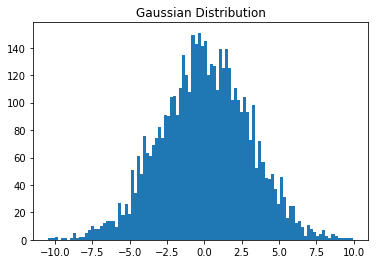

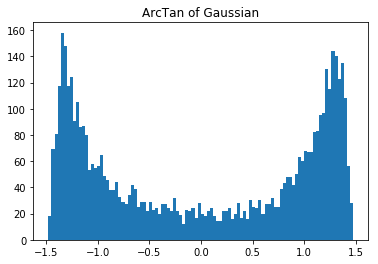

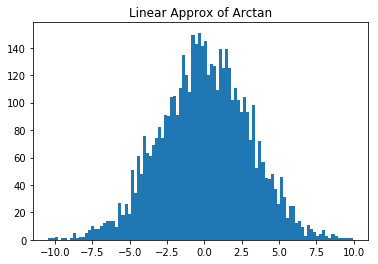

In [27]:
import matplotlib.pyplot as plt
import numpy as np

mean = 0
std = 3

# gaussian distribution
g = np.random.normal(0, 3, 5000)

plt.title("Gaussian Distribution")
plt.hist(g, bins=100)
plt.show()

# nonlinear transformation of gaussian
f = np.arctan(g)

plt.title("ArcTan of Gaussian")
plt.hist(f, bins=100)
plt.show()

# linear approximation of arctan
fa = 1 / (mean**2 + 1) * g

plt.title("Linear Approx of Arctan")
plt.hist(fa, bins=100)
plt.show()

To do this we will need the multivariate Taylor series formula

$
T(x) = f(a) + (x-a)^T D f(a) + \frac{1}{2!}(x-a)^T D^2 f(a) (x-a) + \dots
$

The first order derivative term $Df(a)$ is called the Jacobian. The second order derivative term $D^2 f(a)$ is called the Hessian. Assuming $(x-a)$ is small we will only need the Jacobian since $(x-a)^T(x-a)$ will be even smaller. The formula for the Jacobian in this case is

$
Df(a) = 
\begin{bmatrix}
\frac{\partial \rho}{\partial p_x} & \frac{\partial \rho}{\partial p_y} & \frac{\partial \rho}{\partial v_x} & \frac{\partial \rho}{\partial v_y} \\
\frac{\partial \phi}{\partial p_x} & \frac{\partial \phi}{\partial p_y} & \frac{\partial \phi}{\partial v_x} & \frac{\partial \phi}{\partial v_y} \\
\frac{\partial \dot{\rho}}{\partial p_x} & \frac{\partial \dot{\rho}}{\partial p_y} & \frac{\partial \dot{\rho}}{\partial v_x} & \frac{\partial \dot{\rho}}{\partial v_y} \\
\end{bmatrix}
$

Now to start computing the partial derivatives

$
\begin{align}
\frac{\partial \rho}{\partial p_x} &= \frac{p_{x}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} \\
\frac{\partial \rho}{\partial p_y} &= \frac{p_{y}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} \\
\frac{\partial \rho}{\partial v_x} &= 0 \\
\frac{\partial \rho}{\partial v_y} &= 0 \\
\frac{\partial \phi}{\partial p_x} &= - \frac{p_y}{p_{x}^2 + p_{y}^{2}} \\
\frac{\partial \phi}{\partial p_y} &= \frac{p_x}{p_{x}^2 + p_{y}^{2}} \\
\frac{\partial \phi}{\partial v_x} &= 0 \\
\frac{\partial \phi}{\partial v_y} &= 0 \\
\frac{\partial \dot{\rho}}{\partial p_x} &= - \frac{p_{y} \left(p_{x} v_{y} - p_{y} v_{x}\right)}{\left(p_{x}^{2} + p_{y}^{2}\right)^{\frac{3}{2}}} \\
\frac{\partial \dot{\rho}}{\partial p_y} &= \frac{p_{x} \left(p_{x} v_{y} - p_{y} v_{x}\right)}{\left(p_{x}^{2} + p_{y}^{2}\right)^{\frac{3}{2}}} \\
\frac{\partial \dot{\rho}}{\partial v_x} &= \frac{p_{x}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} \\
\frac{\partial \dot{\rho}}{\partial v_y} &= \frac{p_{y}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} \\
\end{align}
$

The resulting Jaobian, $H_J$ is

$
H_J = 
\begin{bmatrix}
\frac{p_{x}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} & \frac{p_{y}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} & 0 & 0 \\
- \frac{p_y}{p_{x}^2 + p_{y}^{2}} & \frac{p_x}{p_{x}^2 + p_{y}^{2}} & 0 & 0 \\
- \frac{p_{y} \left(p_{x} v_{y} - p_{y} v_{x}\right)}{\left(p_{x}^{2} + p_{y}^{2}\right)^{\frac{3}{2}}} & \frac{p_{x} \left(p_{x} v_{y} - p_{y} v_{x}\right)}{\left(p_{x}^{2} + p_{y}^{2}\right)^{\frac{3}{2}}} & \frac{p_{x}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} & \frac{p_{y}}{\sqrt{p_{x}^{2} + p_{y}^{2}}} \\
\end{bmatrix}
$

So the only change in this case is replacing $H$ with $H_J$ in the measurement update step of the Kalman filter. If the state transition model was nonlinear we would have to compute a linearized version of $F$ using the same procedure as above.

- **Why do we not care about the first term of the taylor series?**
    * We are computing the Jacobian at each state.
- **When do we need to include the Hessian?**
    * If we have low noise sensors with a locally nonlinear transition or measurement function.

# Sensor Fusion General Flow

Now we have all of the components that are required to implement a Kalman filter or extended Kalman filter. Below is a flow diagram of how the algorithm will be implemented.

1. Initialize state using first measurement.
2. Predict new state and belief using state transition matrix and process covariance.
3. Use linear Kalman filter equations to udpate state and belief for lidar measurements.
4. Use nonlinear state to measurement mapping and jacobian to update state and belief for radar measurements.
5. Compute root mean square error.

# Extend Kalman Filter Performance

In the cells below I run the filter on multiple data sets and compute the accuracy.

In [14]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import subprocess


def read_output_file(output_file):
    """
    Read output data into pandas dataframe.
    """
    column_names = ["est_px", "est_py", "est_vx", "est_vy", "meas_px", "meas_py", "gt_px", "gt_py", "gt_vx", "gt_vy"]
    return pd.read_table(output_file, names=column_names)

In [15]:
"""
Create lidar and radar only data sets from the two samples.
"""

data_dir = 'data/'
output_dir = 'output/'

# run kalman filter on each sample dataset
for d in glob.glob(data_dir + "*"):
    
    # find filename and file extension
    fp = os.path.split(d)[-1]
    fn, fe = os.path.splitext(fp)
    
    # create output directory
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    
    # generate output file path
    fp_out = output_dir + fn + '-output' + fe
    
    # run extended kalaman filter on datasets
    os.system('build/ExtendedKF {} {}'.format(d, fp_out))

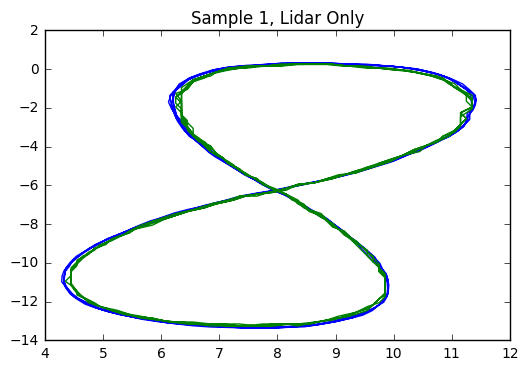

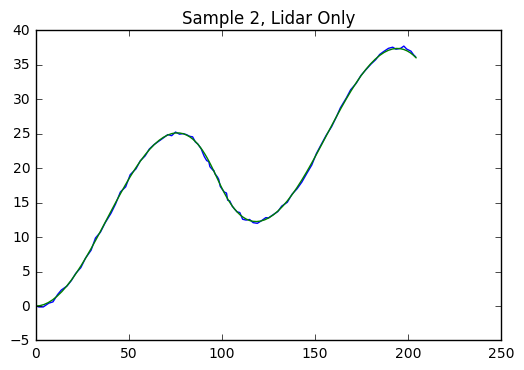

In [16]:
"""
Lidar only dataset
"""

lidar_1 = read_output_file('output/sample-laser-radar-measurement-data-1-lidar-output.txt')
lidar_2 = read_output_file('output/sample-laser-radar-measurement-data-2-lidar-output.txt')

plt.figure()
plt.title("Sample 1, Lidar Only")
plt.plot(lidar_1['est_px'], lidar_1['est_py'])
plt.plot(lidar_1['gt_px'], lidar_1['gt_py'])
plt.show()

plt.figure()
plt.title("Sample 2, Lidar Only")
plt.plot(lidar_2['est_px'], lidar_2['est_py'])
plt.plot(lidar_2['gt_px'], lidar_2['gt_py'])
plt.show()

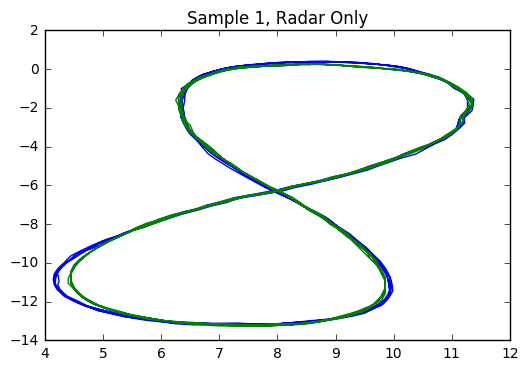

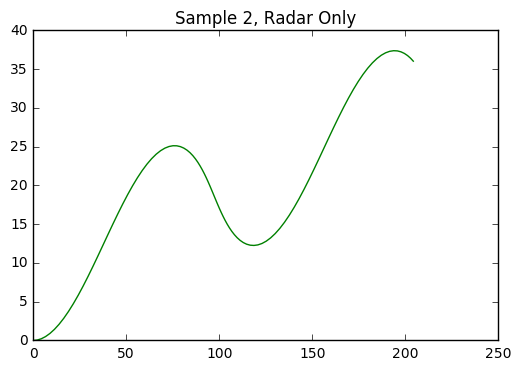

In [17]:
"""
Radar only dataset
"""

radar_1 = read_output_file('output/sample-laser-radar-measurement-data-1-radar-output.txt')
radar_2 = read_output_file('output/sample-laser-radar-measurement-data-2-radar-output.txt')

plt.figure()
plt.title("Sample 1, Radar Only")
plt.plot(radar_1['est_px'], radar_1['est_py'])
plt.plot(radar_1['gt_px'], radar_1['gt_py'])
plt.show()

plt.figure()
plt.title("Sample 2, Radar Only")
plt.plot(radar_2['est_px'], radar_2['est_py'])
plt.plot(radar_2['gt_px'], radar_2['gt_py'])
plt.show()

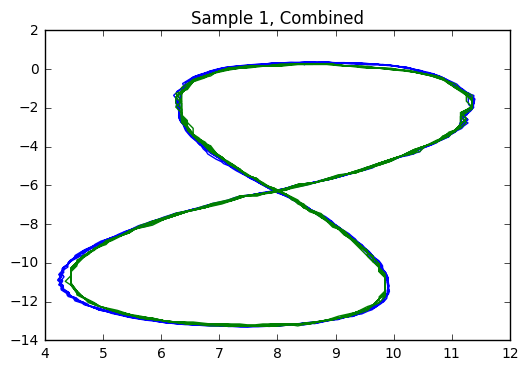

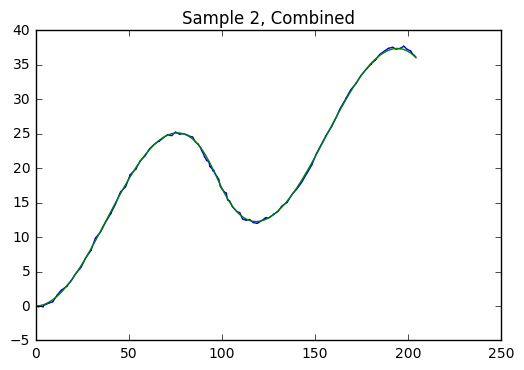

In [18]:
combined_1 = read_output_file('output/sample-laser-radar-measurement-data-1-output.txt')
combined_2 = read_output_file('output/sample-laser-radar-measurement-data-2-output.txt')

plt.figure()
plt.title("Sample 1, Combined")
plt.plot(combined_1['est_px'], combined_1['est_py'])
plt.plot(combined_1['gt_px'], combined_1['gt_py'])
plt.show()

plt.figure()
plt.title("Sample 2, Combined")
plt.plot(combined_2['est_px'], combined_2['est_py'])
plt.plot(combined_2['gt_px'], combined_2['gt_py'])
plt.show()

In [19]:
import numpy as np

def rmse(data):
    # number of measurements
    n = data.shape[0]
    
    # convert estimates and ground truth to arrays
    e = data[['est_px', 'est_py', 'est_vx', 'est_vy']].as_matrix()
    g = data[['gt_px', 'gt_py', 'gt_vx', 'gt_vy']].as_matrix()
    
    # sum of square of residuals
    residuals = np.sum(np.power(e-g,2), axis=0)
    
    # return RMSE
    return np.sqrt(residuals/n)

print("Lidar Only RMSE: {}".format(rmse(lidar_1)))
print("Radar Only RMSE: {}".format(rmse(radar_1)))
print("Sample 1 Combined RMSE: {}".format(rmse(combined_1)))
print("Sample 2 Combined RMSE: {}".format(rmse(combined_2)))

Lidar Only RMSE: [ 0.06960322  0.05887649  0.64545368  0.56982642]
Radar Only RMSE: [ 0.10253598  0.08296112  0.60611643  0.59011248]
Sample 1 Combined RMSE: [ 0.06516498  0.06053766  0.53321151  0.54419271]
Sample 2 Combined RMSE: [ 0.18551725  0.19030089  0.48713766  0.81065708]
